# Classification Questions (target = Attrition)

#### 1-> Build a Decision Tree Classifier to predict Employee Attrition using features like Age,
#### Department, Job_Satisfaction, Work_Life_Balance, and Years_at_Company. Evaluate using
### Accuracy, Precision, Recall, and ROC-AUC.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv(r"D:\iiitnr\Assignment\assignment4\synthetic_employee_data.csv")
df.head()

,Employee_ID,Age,Gender,Department,Years_at_Company,Monthly_Salary,Education_Level,Num_Trainings,Work_Life_Balance,Job_Satisfaction,Attrition,Performance_Rating
0,1001,50,Male,HR,22,164921.03,1,10,4,3,No,4.16
1,1002,36,Female,Admin,29,44632.13,2,7,1,5,No,2.37
2,1003,29,Male,Admin,10,32549.50,2,8,4,3,No,2.91
3,1004,42,Female,IT,4,180812.85,1,3,3,2,No,1.38
4,1005,40,Male,R&D,21,89810.17,2,6,1,3,No,1.75


In [5]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [6]:
X = df[['Age', 'Department', 'Job_Satisfaction', 'Work_Life_Balance', 'Years_at_Company']]
y = df['Attrition']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]


In [11]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [12]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC Score: 1.0


In [13]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00         8

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
 [[392   0]
 [  0   8]]


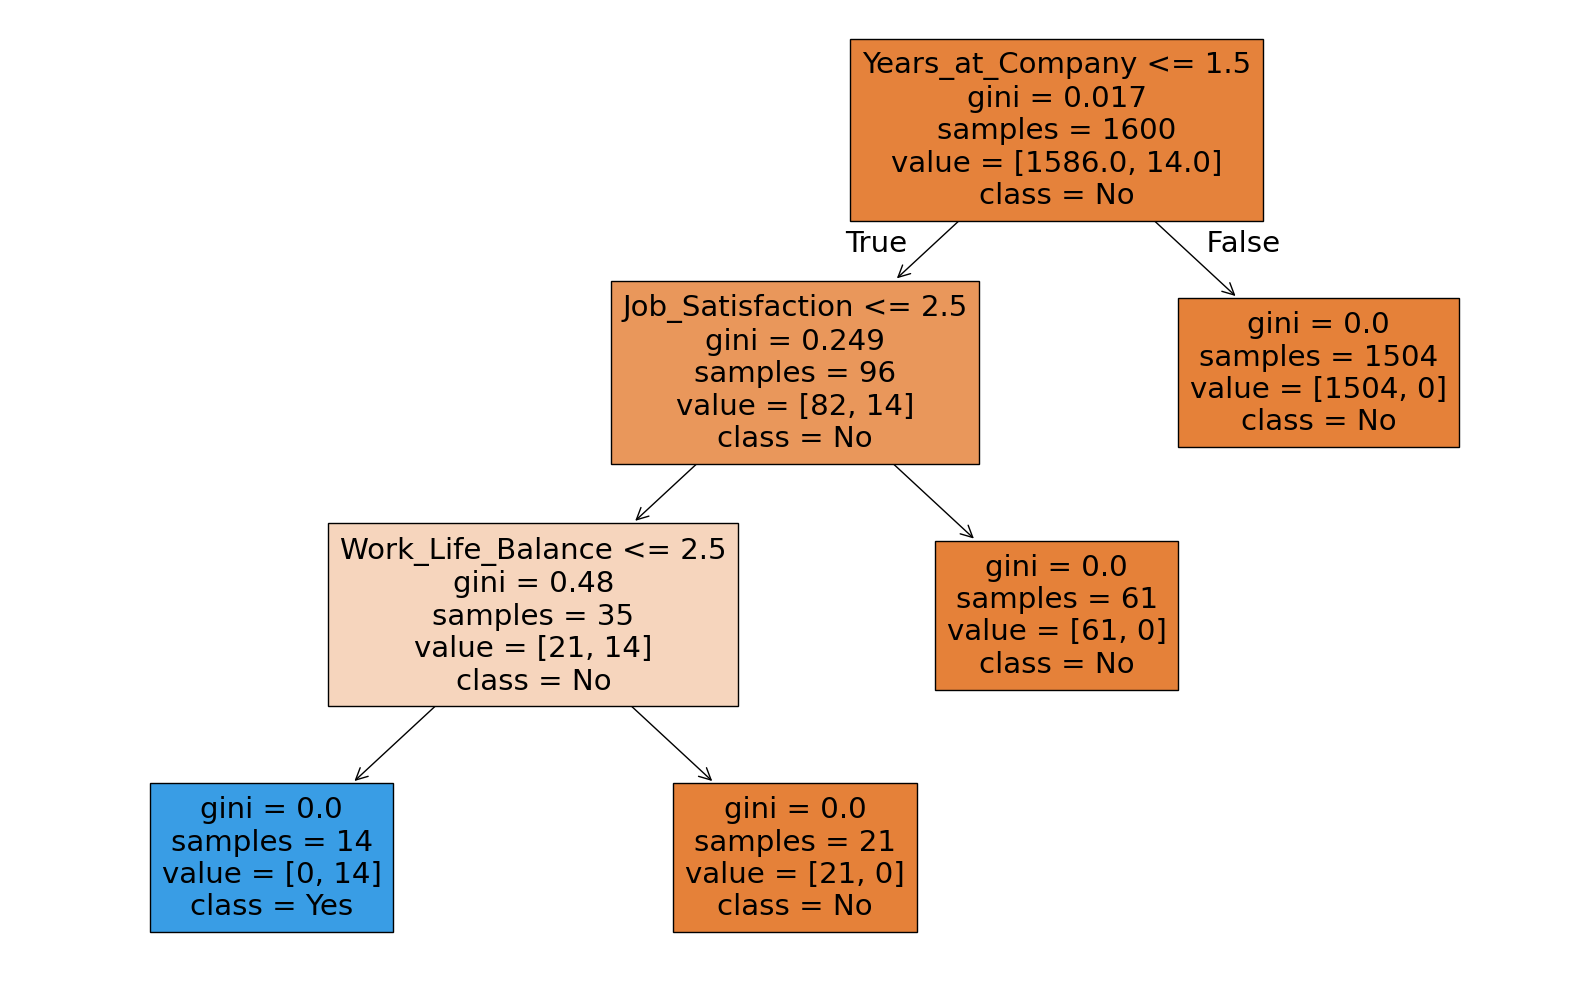

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.tight_layout()
plt.show()


### 2-> Compare Logistic Regression, Random Forest, and XGBoost classifiers for predicting
### Attrition. Use 10-fold cross-validation and report the average F1-score for each. Which
### model generalizes better?

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
use_label_encoder=False


In [17]:
df = pd.read_csv(r"D:\iiitnr\Assignment\assignment4\synthetic_employee_data.csv")
df.head()

,Employee_ID,Age,Gender,Department,Years_at_Company,Monthly_Salary,Education_Level,Num_Trainings,Work_Life_Balance,Job_Satisfaction,Attrition,Performance_Rating
0,1001,50,Male,HR,22,164921.03,1,10,4,3,No,4.16
1,1002,36,Female,Admin,29,44632.13,2,7,1,5,No,2.37
2,1003,29,Male,Admin,10,32549.50,2,8,4,3,No,2.91
3,1004,42,Female,IT,4,180812.85,1,3,3,2,No,1.38
4,1005,40,Male,R&D,21,89810.17,2,6,1,3,No,1.75


In [19]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})




In [22]:
X = df[['Age', 'Department', 'Job_Satisfaction', 'Work_Life_Balance', 'Years_at_Company']]
y = df['Attrition']


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


In [30]:

X, y = make_classification(n_samples=500, n_features=20, random_state=42)
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [32]:

lr_f1 = cross_val_score(lr, X, y, cv=10, scoring='f1')
rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1')
xgb_f1 = cross_val_score(xgb, X, y, cv=10, scoring='f1')


print("Logistic Regression F1:", lr_f1.mean())
print("Random Forest F1:", rf_f1.mean())
print("XGBoost F1:", xgb_f1.mean())



c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:19] WARNING: C:\actio

Logistic Regression F1: 0.8713117065480966
Random Forest F1: 0.9307220863439662
XGBoost F1: 0.9262978381988247


c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# 3->Use SMOTE to handle class imbalance (if exists after train-test split) and retrain a Random Forest Classifier. Compare model performance before and after applying SMOTE.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\iiitnr\Assignment\assignment4\synthetic_employee_data.csv")
df.head()

,Employee_ID,Age,Gender,Department,Years_at_Company,Monthly_Salary,Education_Level,Num_Trainings,Work_Life_Balance,Job_Satisfaction,Attrition,Performance_Rating
0,1001,50,Male,HR,22,164921.03,1,10,4,3,No,4.16
1,1002,36,Female,Admin,29,44632.13,2,7,1,5,No,2.37
2,1003,29,Male,Admin,10,32549.50,2,8,4,3,No,2.91
3,1004,42,Female,IT,4,180812.85,1,3,3,2,No,1.38
4,1005,40,Male,R&D,21,89810.17,2,6,1,3,No,1.75


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [7]:
X = df[['Age', 'Department', 'Job_Satisfaction', 'Work_Life_Balance', 'Years_at_Company']]
y = df['Attrition']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
print("Before SMOTE:\n", y_train.value_counts())


Before SMOTE:
 Attrition
0    1582
1      18
Name: count, dtype: int64


In [10]:
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)

In [11]:
print("\n Performance BEFORE SMOTE")
print(confusion_matrix(y_test, y_pred_before))
print(classification_report(y_test, y_pred_before))


 Performance BEFORE SMOTE
[[396   0]
 [  0   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00         4

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [12]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [13]:
print("\nAfter SMOTE:\n", y_train_sm.value_counts())



After SMOTE:
 Attrition
0    1582
1    1582
Name: count, dtype: int64


In [14]:
model_after = RandomForestClassifier(random_state=42)
model_after.fit(X_train_sm, y_train_sm)
y_pred_after = model_after.predict(X_test)

In [15]:
print("\n Performance AFTER SMOTE")
print(confusion_matrix(y_test, y_pred_after))
print(classification_report(y_test, y_pred_after))


 Performance AFTER SMOTE
[[396   0]
 [  0   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00         4

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



### 4. Perform Hyperparameter tuning on a Random Forest Classifier using GridSearchCV. Tune parameters like n_estimators, max_depth, and min_samples_split. Report the best parameter set and corresponding ROC-AUC.

In [16]:
# import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [17]:
df = pd.read_csv(r"D:\iiitnr\Assignment\assignment4\synthetic_employee_data.csv")
df.head()

,Employee_ID,Age,Gender,Department,Years_at_Company,Monthly_Salary,Education_Level,Num_Trainings,Work_Life_Balance,Job_Satisfaction,Attrition,Performance_Rating
0,1001,50,Male,HR,22,164921.03,1,10,4,3,No,4.16
1,1002,36,Female,Admin,29,44632.13,2,7,1,5,No,2.37
2,1003,29,Male,Admin,10,32549.50,2,8,4,3,No,2.91
3,1004,42,Female,IT,4,180812.85,1,3,3,2,No,1.38
4,1005,40,Male,R&D,21,89810.17,2,6,1,3,No,1.75


In [18]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [19]:
X = df[['Age', 'Department', 'Job_Satisfaction', 'Work_Life_Balance', 'Years_at_Company']]
y = df['Attrition']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
rf = RandomForestClassifier(random_state=42)


In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [23]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [24]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [25]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [26]:
print(" Best Parameters Found:")
print(best_params)
print(f"\n ROC-AUC Score of Best Model: {roc_auc:.4f}")

 Best Parameters Found:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

 ROC-AUC Score of Best Model: 1.0000


### 5-> 5Use Chi-Square test for feature selection and identify the top 5 significant features contributing to employee attrition. Retrain a classifier using only these features and report performance metrics.

In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

In [28]:
df_encoded = df.copy()


In [29]:
label_enc = LabelEncoder()
df_encoded['Gender'] = label_enc.fit_transform(df_encoded['Gender']) 
df_encoded['Department'] = label_enc.fit_transform(df_encoded['Department'])
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})

In [30]:
X_all = df_encoded.drop(['Employee_ID', 'Attrition'], axis=1)
y_all = df_encoded['Attrition']

In [3]:
mask = selector.get_support()
selected_features = X_all.columns[mask]
print("Top 5 Features Selected by Chi-Square:\n", selected_features.tolist())

NameError: name 'selector' is not defined

In [1]:
mask = selector.get_support()
selected_features = X_all.columns[mask]
print("Top 5 Features Selected by Chi-Square:\n", selected_features.tolist())

NameError: name 'selector' is not defined